In [3]:
import pandas as pd
import matplotlib
from matplotlib import pylab as plt

In [4]:
# Read the Data
df = pd.read_csv('/Users/apple/Desktop/Data1030 Project/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [101]:
# EDA: data shape
df.shape

(5110, 12)

In [104]:
# Show data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [102]:
# EDA: the distribution of target variable
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [103]:
# EDA: show the unique categories in each categorical feature
print(df['smoking_status'].unique())
print(df['gender'].unique())
print(df['work_type'].unique())
print(df['ever_married'].unique())
print(df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Yes' 'No']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [100]:
# EDA: show corr between features
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


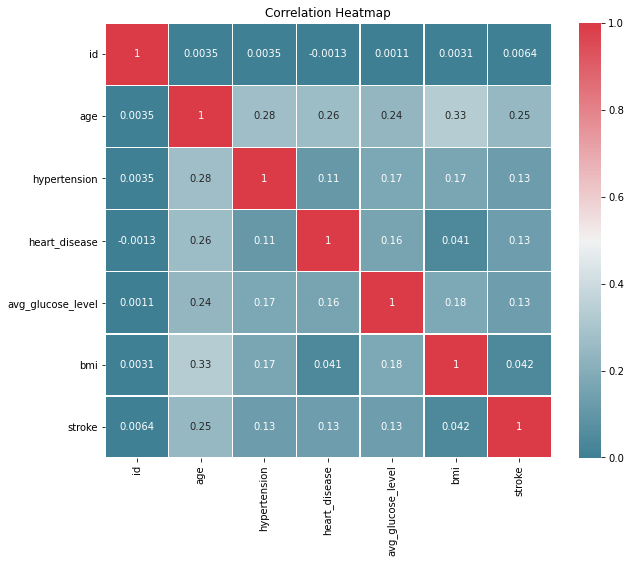

In [106]:
# EDA:heatmap to show the corr between X variables and target variables
import seaborn as sns


fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, linewidths=.5, ax=ax)
ax.set_title('Correlation Heatmap')

plt.show()

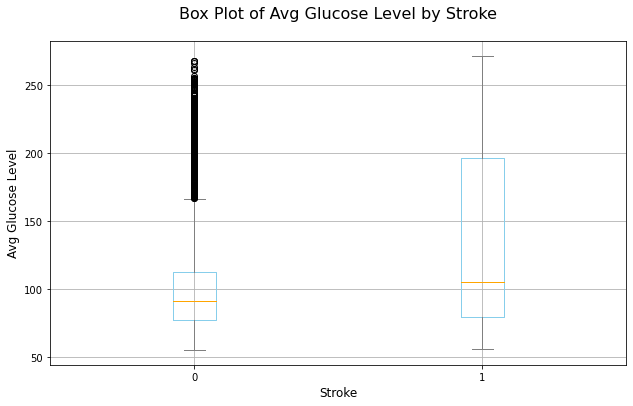

In [99]:
# EDA: Use box plot to show the relationship between stroke and average glucose level

box_colors = {'boxes': 'skyblue', 'whiskers': 'gray', 'medians': 'orange', 'caps': 'gray'}
bp = df[['avg_glucose_level', 'stroke']].boxplot(by='stroke', figsize=(10, 6), color=box_colors)
plt.suptitle('Box Plot of Avg Glucose Level by Stroke', fontsize=16)
plt.title('')
plt.xlabel('Stroke', fontsize=12)
plt.ylabel('Avg Glucose Level', fontsize=12)

plt.show()

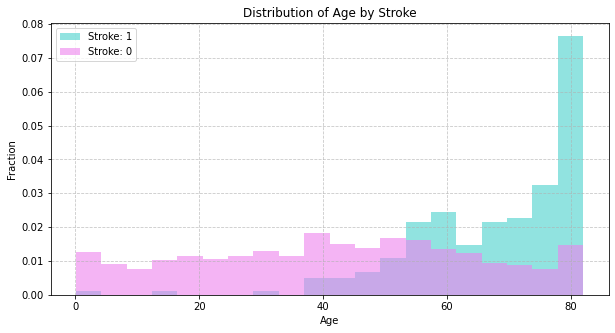

In [47]:
# EDA: category-specific histogram to show the different distribution of age by stroke
categories = df['stroke'].unique()
bin_range = (df['age'].min(), df['age'].max())

plt.figure(figsize=(10, 5))
colors = ['mediumturquoise','violet'] 

for idx, c in enumerate(categories):
    plt.hist(
        df[df['stroke'] == c]['age'],
        alpha=0.6,
        label='Stroke: ' + str(c),
        range=bin_range,
        bins=20,
        density=True,
        color=colors[idx] 
    )

plt.title('Distribution of Age by Stroke')
plt.xlabel('Age')
plt.ylabel('Fraction')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

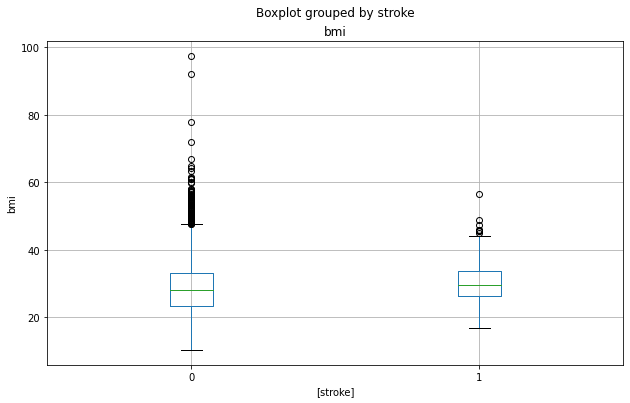

In [5]:
df[['bmi','stroke']].boxplot(by='stroke',figsize=(10,6))
plt.ylabel('bmi')
plt.show()

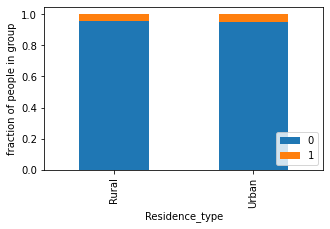

In [7]:
count_matrix = df.groupby(['Residence_type', 'stroke']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

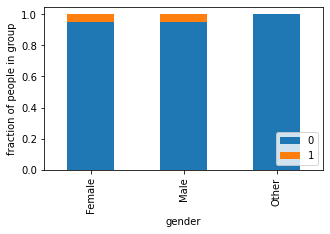

In [8]:
count_matrix = df.groupby(['gender', 'stroke']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

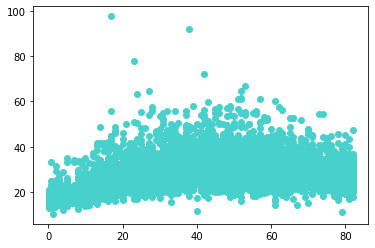

In [90]:
plt.scatter(df['age'], df['bmi'], c ="mediumturquoise")
plt.show()

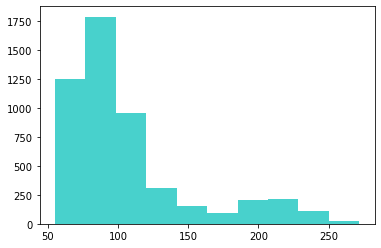

In [82]:
plt.hist(df['avg_glucose_level'],color = 'mediumturquoise')
plt.show()

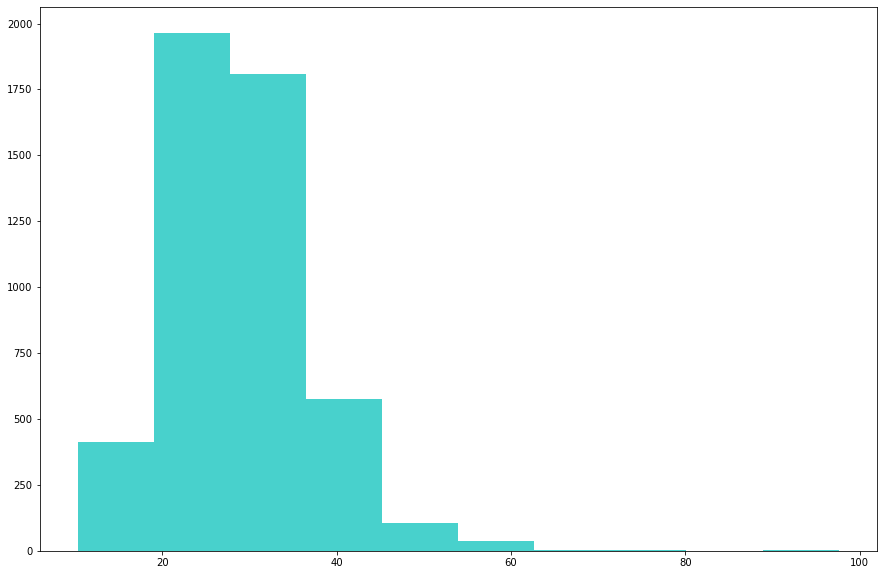

In [84]:
plt.figure(figsize = (15,10))
plt.hist(df['bmi'], color = 'mediumturquoise')
plt.show()

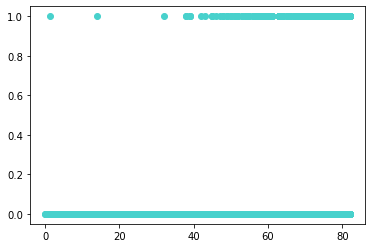

In [81]:
plt.scatter(df['age'], df['stroke'], c ="mediumturquoise")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Split data
y = df['stroke']
X = df.drop(columns = ['stroke'])

# First split the data into other and test
random_state = 42
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
#print(X_other.shape)
#print(X_test.shape)
#print(y_other.unique())
#print(y_test.unique())


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# collect which encoder to use on each feature
# needs to be done manually
onehot_ftrs = ['gender','ever_married','work_type','Residence_type','smoking_status']
minmax_ftrs = ['age']
std_ftrs = ['avg_glucose_level','bmi']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])

In [27]:
# Do StratifiedKFold on other
n_splits = 5
kf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state)
for train_index, val_index in kf.split(X_other, y_other):
    print('New Fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    print(X_train_prep.shape)

New Fold
(3270, 18)
New Fold
(3270, 19)
New Fold
(3270, 19)
New Fold
(3271, 19)
New Fold
(3271, 19)
